In [1]:
'''
Program to visualize the data from 3D element analysis
Unit: mm
Author: Yitian Shao
Created on 2021.06.08
'''
# Repeat IPython function to prevent some graphical glitches
%matplotlib notebook 
%matplotlib notebook 

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Pascal2Psi = 0.00014503773800722

In [2]:
'''
General Functions
'''

def aPlot(figName):
    fig1 = plt.figure(figsize = (10,4))
    fig1.suptitle(figName, fontsize=16)
    ax = fig1.add_subplot(111, projection='3d')
    return ax

In [5]:
'''
Pouch Design
'''
pouchStructure = np.array([4, 3, 2, 1]) # Sealing dash number
rectNum = np.sum(pouchStructure + 1) # Number of rectangle pouch-cell
triNum = rectNum + np.sum(pouchStructure) # Number of triangle pouch-cell
print("Pouch contains totally %d rectange and %d triangle" % (rectNum, triNum))

Pouch contains totally 14 rectange and 24 triangle


In [6]:
DATA_PATH = "./data/PouchData_A.csv"
data = pd.read_csv(DATA_PATH)
data.head(1)

,m,c,R,triFA,triPSA,triVol,rectVol,triTF,rectTF,w
0,6.25,13.172467,20.0,8.696251,11.740162,105.068756,173.925029,0.090403,5.320687,20.0


In [7]:
'''
Additional Computation for the whole pouch 
'''
totalVol = (triNum * data['triVol'] + rectNum * data['rectVol']) # (mm3)
totalLength = (data['c'] + data['w']) * pouchStructure.size # (mm)
totalWidth = data['m'] * 2 * (np.amax(pouchStructure) + 1) # (mm)

triangleArea = data['c'] * data['m'] # (mm2) Top-view area of a triangle pouch (Not surface area)
rectangleArea = 2 * data['m'] * data['w'] # (mm2) Top-view area of a rectangle pouch (Not surface area)
totalArea = (triNum * triangleArea + rectNum * rectangleArea) # (mm2) Top-view area (Not surface area)
totalForce = (triNum * data['triTF'] + rectNum * data['rectTF']) # (Newton)
avgPressure = 1e6 * totalForce / totalArea # (Pascal)

In [9]:
# '''
# m = 5 mm, R = 70 mm 
# '''
# ind = (data['m'] == 5.0) & (data['R'] == 70.0) 

# # Front and back area of flow
# fig1 = plt.figure(figsize = (10,4))
# fig1.suptitle('Entire Pouch', fontsize=16)
# ax = fig1.add_subplot(111)
# ax.set_xlabel('c (mm)')
# ax.plot(data.loc[ind,'c'], data.loc[ind,'triFA'], c = 'r')
# ax.plot(data.loc[ind,'c'], data.loc[ind,'triPSA'], c = 'b')
# ax.legend(['triFA (mm2)','triPSA (mm2)'])
# plt.show()


<IPython.core.display.Javascript object>


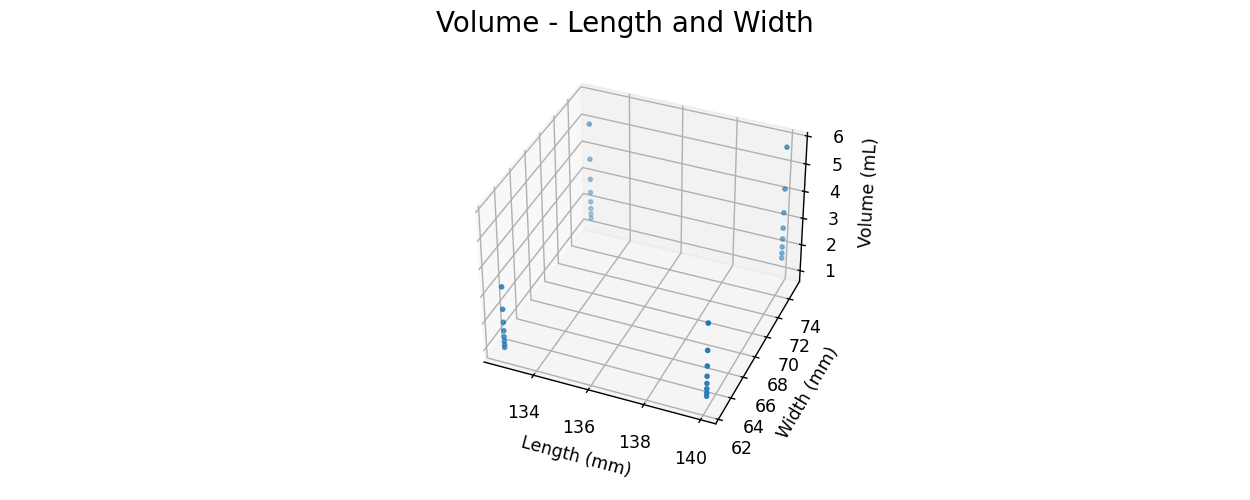

In [8]:
# Total Volume vs total length and width
ind = (data['R'] > 20) #& (totalWidth < 120);
ax = aPlot('Volume - Length and Width');
ax.set_xlabel('Length (mm)');
ax.set_ylabel('Width (mm)');
ax.set_zlabel('Volume (mL)');
ax.scatter3D(totalLength[ind], totalWidth[ind], totalVol[ind]/1000, s = 5);


<IPython.core.display.Javascript object>


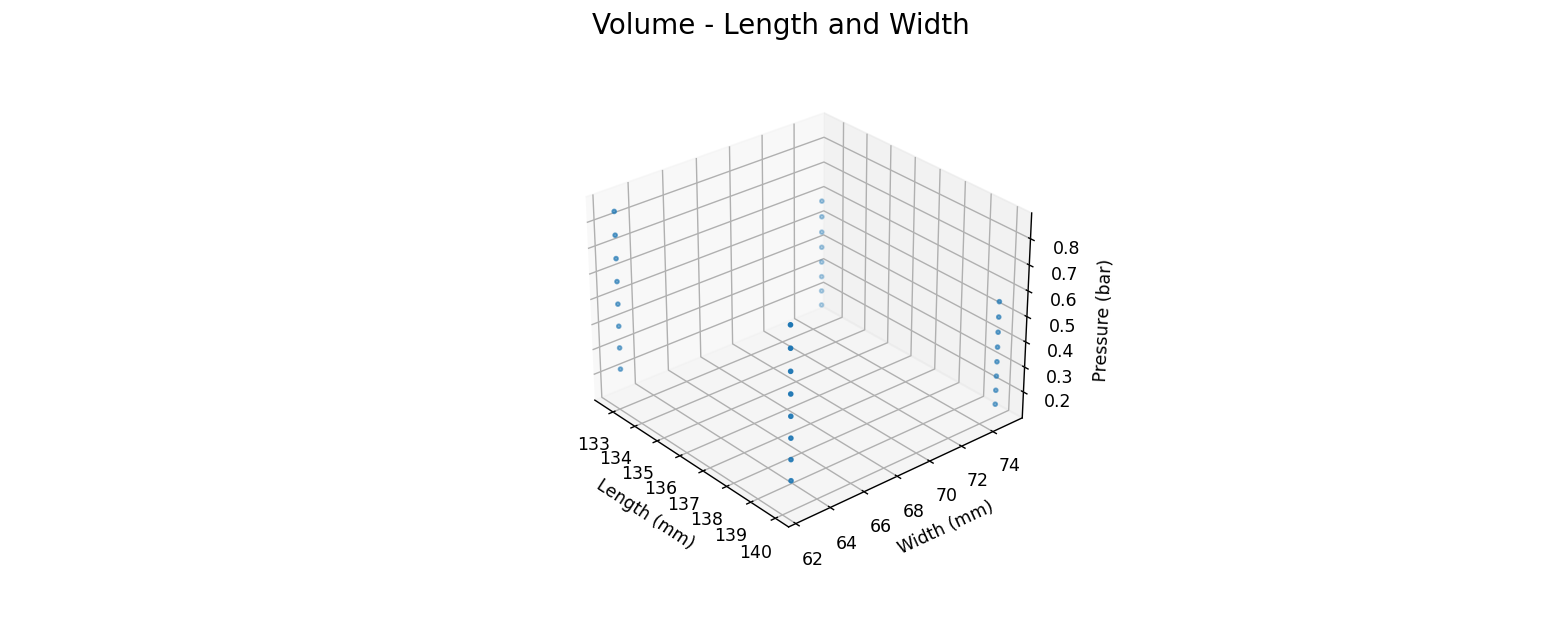

In [10]:
# Avg. Pressure vs total length and width
ind = (data['R'] > 20) #& (totalWidth > 40);
ax = aPlot('Volume - Length and Width');
ax.set_xlabel('Length (mm)');
ax.set_ylabel('Width (mm)');
ax.set_zlabel('Pressure (bar)');
ax.scatter3D(totalLength[ind], totalWidth[ind], avgPressure[ind]/100000, s = 5);

<IPython.core.display.Javascript object>


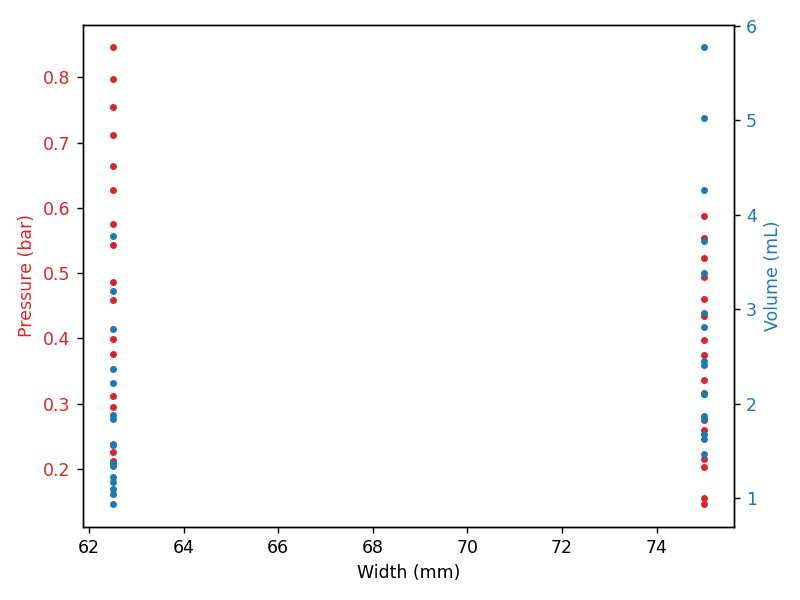

In [12]:
# Balance between pressure and volume
ind = (data['R'] > 20);

fig1, ax1 = plt.subplots()

ax1.set_xlabel('Width (mm)')
ax1.set_ylabel('Pressure (bar)', color='tab:red')
ax1.plot(totalWidth[ind], avgPressure[ind] * 0.00001, '.', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Volume (mL)', color='tab:blue')  
ax2.plot(totalWidth[ind], totalVol[ind] * 0.001, '.', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig1.tight_layout()  # otherwise the right y-label is slightly clipped


<IPython.core.display.Javascript object>


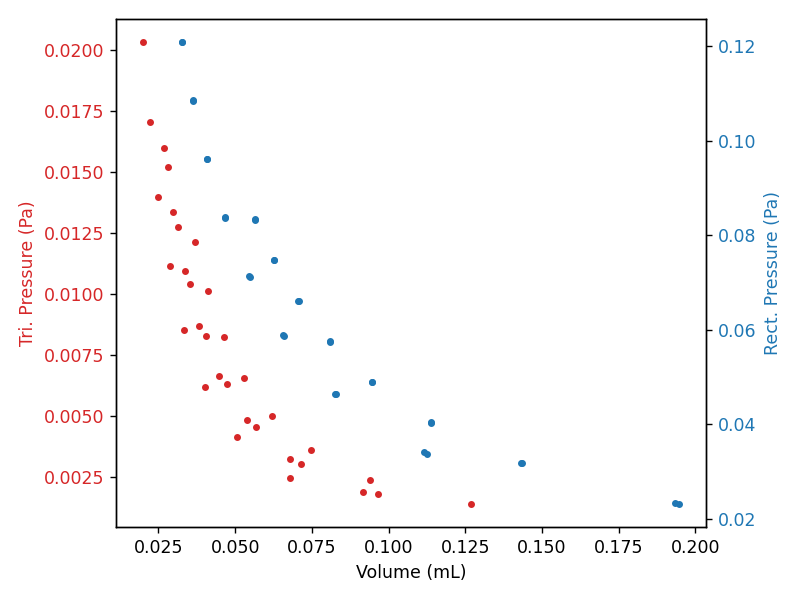

In [13]:
# One cell-Pouch
# ind = (data['R'] > 50) & (data['c'] == 10.0);
ind = (data['R'] > 20) #& (totalVol > 6000);

fig1, ax1 = plt.subplots()

ax1.set_xlabel('Volume (mL)')

ax1.set_ylabel('Tri. Pressure (Pa)', color='tab:red')

ax1.plot(data.loc[ind, 'triVol'] * 0.001, data.loc[ind, 'triTF']/triangleArea[ind], '.', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Rect. Pressure (Pa)', color='tab:blue')  

ax2.plot(data.loc[ind, 'rectVol'] * 0.001, data.loc[ind, 'rectTF']/rectangleArea[ind], '.', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig1.tight_layout()  # otherwise the right y-label is slightly clipped

In [61]:
# mLabels = [5.0, 10.0, 15.0]

# # Total Volume
# fig1 = plt.figure(figsize = (10,4))
# fig1.suptitle('Entire Pouch', fontsize=16)
# #plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))
# ax = fig1.add_subplot(111, projection='3d')
# ax.set_xlabel('c (mm)')
# ax.set_ylabel('R (mm)')
# ax.set_zlabel('Triangle Volume (mL)')

# for mLabel in mLabels:
#     ind = (data['m'] == mLabel) #& (totalVol > 5900.0) & (totalVol < 6100.0)
#     ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], totalVol[ind]/1000, s = 5)
# ax.legend(['m = %.1f mm' % mLabel for mLabel in mLabels])
# plt.show()

In [11]:
# # Fixed R
# fixRs = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# fig1 = plt.figure(figsize = (8,4))
# ax = fig1.add_subplot(111)
# ax.set_xlabel('c (mm)')

# for fixR in fixRs:
#     ind = (data['m'] == 5.0) & (data['R'] == fixR) & (data['c'] < 16)
#     ax.plot(data.loc[ind,'c'], data.loc[ind,'triFA'], c = 'r')
#     ax.plot(data.loc[ind,'c'], data.loc[ind,'triPSA'], c = 'b')
# ax.legend(['triFA (mm2)','triPSA (mm2)'])
# plt.show()

<IPython.core.display.Javascript object>


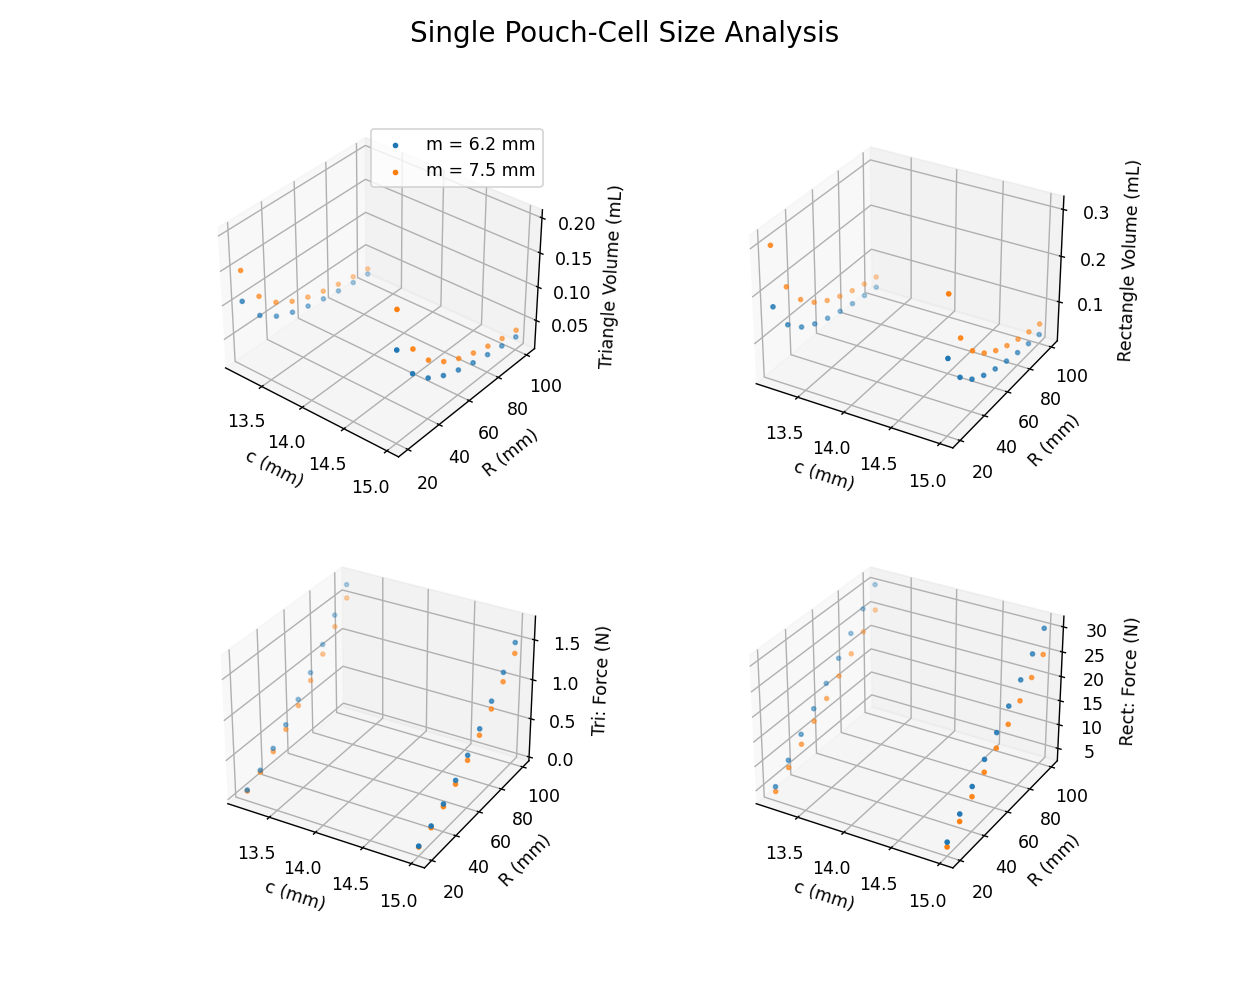

In [15]:
#mLabels = pd.unique(data['m'])
mLabels = [6.25, 7.5]

# Single Pouch Size
fig1 = plt.figure(figsize = (10,8))
fig1.suptitle('Single Pouch-Cell Size Analysis', fontsize=16)

ax = fig1.add_subplot(221, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Triangle Volume (mL)')
for mLabel in mLabels:
    ind = (data['m'] == mLabel)  
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'triVol']/1000, s = 5)
ax.legend(['m = %.1f mm' % mLabel for mLabel in mLabels])
plt.show()

ax = fig1.add_subplot(222, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Rectangle Volume (mL)')
for mLabel in mLabels:
    ind = (data['m'] == mLabel)  
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'rectVol']/1000, s = 5)
plt.show()

# ax = fig1.add_subplot(223, projection='3d')
# ax.set_xlabel('c (mm)')
# ax.set_ylabel('R (mm)')
# ax.set_zlabel('Front Area (mm2)')
# for mLabel in mLabels:
#     ind = (data['m'] == mLabel)  
#     ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'triFA'], s = 5)
# plt.show()

# ax = fig1.add_subplot(224, projection='3d')
# ax.set_xlabel('c (mm)')
# ax.set_ylabel('R (mm)')
# ax.set_zlabel('Proj. Side Area (mm2)')
# for mLabel in mLabels:
#     ind = (data['m'] == mLabel)  
#     ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'triPSA'], s = 5)
# plt.show()

ax = fig1.add_subplot(223, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Tri: Force (N)')
for mLabel in mLabels:
    ind = (data['m'] == mLabel) 
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'triTF'], s = 5)
plt.show()

ax = fig1.add_subplot(224, projection='3d')
ax.set_xlabel('c (mm)')
ax.set_ylabel('R (mm)')
ax.set_zlabel('Rect: Force (N)')
for mLabel in mLabels:
    ind = (data['m'] == mLabel)
    ax.scatter3D(data.loc[ind,'c'], data.loc[ind,'R'], data.loc[ind,'rectTF'], s = 5)
plt.show()

In [ ]:
# # Test
# fig2 = plt.figure(figsize = (10,6))
# #plt.hist(data.loc[ind, 'triAEF'], bins = 1000);

# y = data.loc[ind & (data['triAEF'] < 1e6),'triAEF']/1000
# plt.scatter(data.loc[ind & (data['triAEF'] < 1e6),'c'], y)